**Principal Component Analysis**

In [14]:
# Load data
import pandas as pd
df = pd.read_csv("autos.csv")

{'symboling': {0: 3},
 'make': {0: 'alfa-romero'},
 'fuel_type': {0: 'gas'},
 'aspiration': {0: 'std'},
 'num_of_doors': {0: 2},
 'body_style': {0: 'convertible'},
 'drive_wheels': {0: 'rwd'},
 'engine_location': {0: 'front'},
 'wheel_base': {0: 88.6},
 'length': {0: 168.8},
 'width': {0: 64.1},
 'height': {0: 48.8},
 'curb_weight': {0: 2548},
 'engine_type': {0: 'dohc'},
 'num_of_cylinders': {0: 4},
 'engine_size': {0: 130},
 'fuel_system': {0: 'mpfi'},
 'bore': {0: 3.47},
 'stroke': {0: 2.68},
 'compression_ratio': {0: 9},
 'horsepower': {0: 111},
 'peak_rpm': {0: 5000},
 'city_mpg': {0: 21},
 'highway_mpg': {0: 27},
 'price': {0: 13495}}

In [15]:
df.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [17]:
# selected features
features = ['highway_mpg', 'engine_size', 'horsepower', 'curb_weight']
X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

In [18]:
# Standarize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [19]:
# Decomposition PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]


['PC1', 'PC2', 'PC3', 'PC4']

In [20]:
# Create DataFrame with components
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


In [21]:
# Transpose matrix
loadings = pd.DataFrame(
  pca.components_.T,
  columns=component_names,
  index=X.columns
)
loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

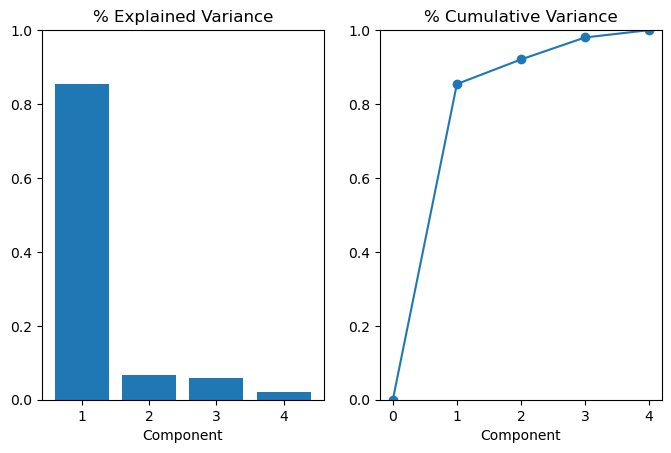

In [22]:
# Plot variance
from matplotlib import pyplot as plt
import numpy as np


def plot_variance(pca):
  fig, axs = plt.subplots(1, 2)
  n = pca.n_components_
  grid = np.arange(1, n+1)
  evr = pca.explained_variance_ratio_
  axs[0].bar(grid, evr)
  axs[0].set(xlabel='Component', title='% Explained Variance', ylim=(0.0, 1.0))
  cv = np.cumsum(evr)
  axs[1].plot(np.r_[0, grid], np.r_[0, cv], 'o-')
  axs[1].set(xlabel='Component', title='% Cumulative Variance', ylim=(0.0, 1.0))
  fig.set(figwidth=8, dpi=100)
  return axs

plot_variance(pca)

In [24]:
# Scores
from sklearn.feature_selection import mutual_info_regression


def make_mi_scores(X, y, discrete_features):
  mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.013046
PC2    0.379344
PC3    0.307064
PC4    0.204926
Name: MI Scores, dtype: float64

In [26]:
# show dataframe sorted
idx = X_pca['PC3'].sort_values(ascending=False).index
cols = ['make', 'body_style', 'horsepower', 'curb_weight']
df.loc[idx, cols]

,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


<Axes: xlabel='sports_or_wagon', ylabel='price'>

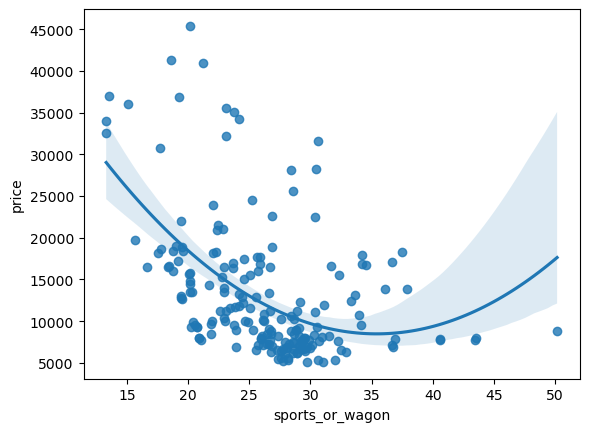

In [27]:
import seaborn as sns
df['sports_or_wagon'] =X.curb_weight / X.horsepower
sns.regplot(x='sports_or_wagon', y='price', data=df, order=2)